<h3> Importing necessary libaries <h3>

In [ ]:
import pandas as py
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



<h3> Loading the data <h3>

In [ ]:
df = py.read_csv('amazon_2023_2024.csv')
five_years_df =  py.read_csv('amazon_stock_2020_2024.csv')

<h3> Converting  date index to date time format <h3>


In [73]:
df['Date'] = py.to_datetime(df['Date']) 
five_years_df ['Date'] =  py.to_datetime(df['Date'])

<h3> Checking for nulls <h3>

In [74]:

df.set_index('Date',inplace=True)
five_years_df.set_index('Date',inplace=True)
nulls =  df.isnull().any()
print()


<h3> Creating  datasets for  predicting closed price for the stock <h3>

<h4> For 5 years span <h4>

In [79]:
date_and_closing_pair_5 =  py.DataFrame({
    'Date':five_years_df.index,
    'Close':five_years_df['Close']
})

<h4> For 2023-2024

In [81]:

date_and_closing_pair = py.DataFrame({
    'Date' :df.index,
    'Closed':df['Close']
})

date_and_closing_pair.set_index('Date',inplace=True)

print(date_and_closing_pair)
has_null = date_and_closing_pair.isnull().values.any()
print(has_null)



                Closed
Date                  
2023-05-01  102.050003
2023-05-02  103.629997
2023-05-03  103.650002
2023-05-04  104.000000
2023-05-05  105.660004
...                ...
2024-04-25  173.669998
2024-04-26  179.619995
2024-04-29  180.960007
2024-04-30  175.000000
2024-05-01  179.000000

[253 rows x 1 columns]
False


<h3>  Plotting  the time series  from  2020 to 2024   <h3>

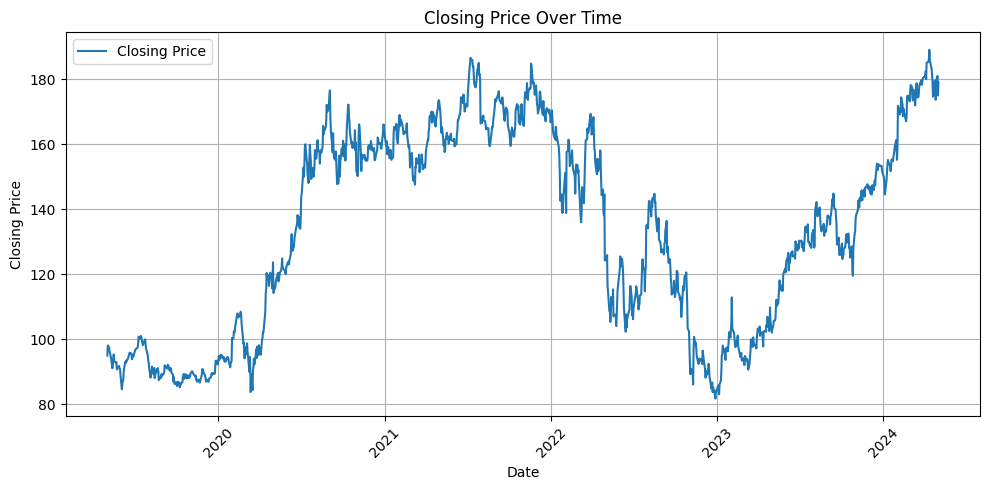

In [59]:
plt.figure(figsize=(10, 5))  
plt.plot(date_and_closing_pair.index, date_and_closing_pair['Closed'], label='Closing Price')
plt.title('Closing Price Over Time') 
plt.xlabel('Date')  
plt.ylabel('Closing Price')  
plt.legend()  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

<h3> Plotting the series from 2023 to 2024 <h3>

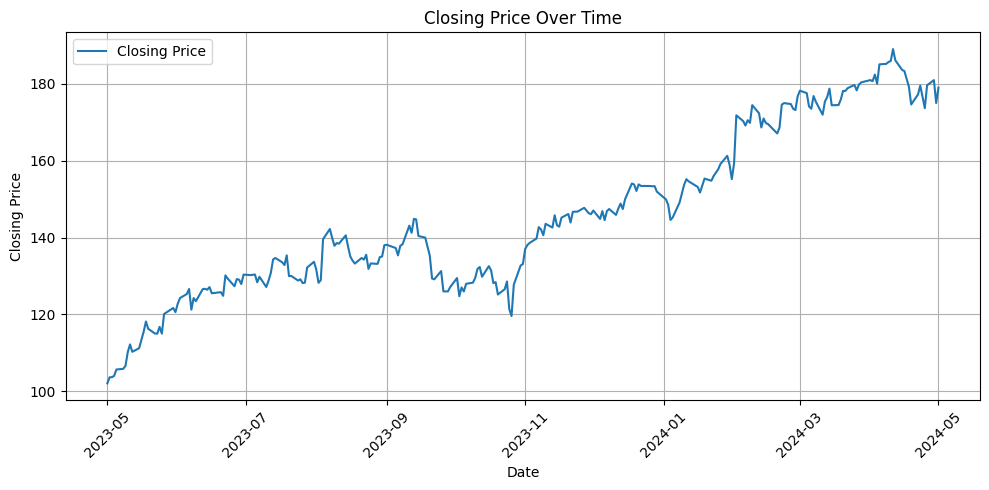

In [82]:
plt.figure(figsize=(10, 5)) 
plt.plot(date_and_closing_pair.index, date_and_closing_pair['Closed'], label='Closing Price')
plt.title('Closing Price Over Time')  
plt.xlabel('Date')  
plt.ylabel('Closing Price') 
plt.legend() 
plt.grid(True) 
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()  

<h3> Creating  40 lagged features  for 2023-2034 dataset <h3>

In [91]:

for i in range(0, 40):
    date_and_closing_pair[f'lag_{i}'] = date_and_closing_pair['Closed'].shift(i)
    date_and_closing_pair[f'lag_{i}']=  date_and_closing_pair[f'lag_{i}'].fillna(0.0)






In [ ]:
X = date_and_closing_pair[[f'lag_{i}' for i in range(1, 40)]]  # using lag_1 to lag_40 as features
y = date_and_closing_pair['Closed']

print(X)

<h3>Split the dataset into   train and test datasets

In [107]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  # random_state ensures reproducibility


<h3> Initialize and train linear regression model on 2023-2024 dataset <h3>

In [110]:

model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

<h3> Start predicting and measuring  the accuracy <h3>

In [109]:
# Predict the values for the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally calculate the Root Mean Squared Error
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 39.78769602204451
Root Mean Squared Error: 6.307748887047146


<h3>Plotting the predicted value vs actual value <h3>

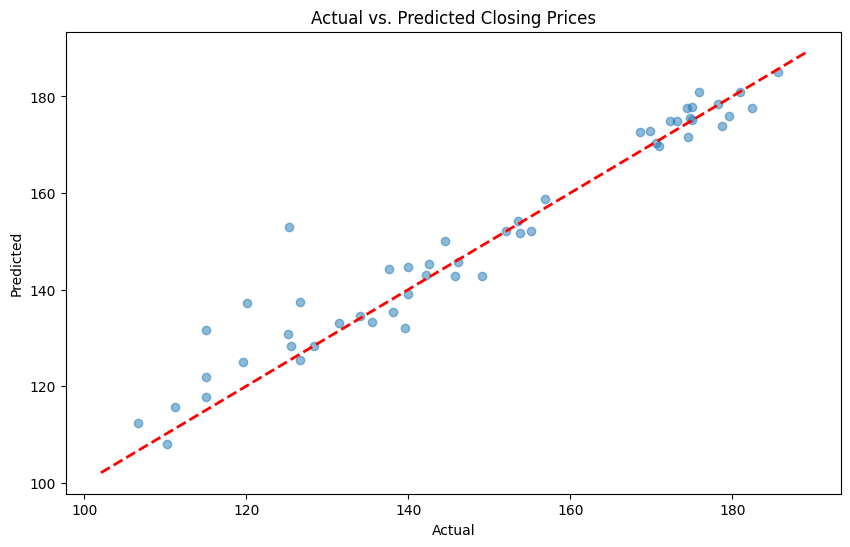

In [111]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Closing Prices')
plt.show()

